In [1]:
%matplotlib inline
from scipy import misc
from scipy.ndimage import gaussian_filter
from PIL import Image
import numpy as np
import cv2


import matplotlib.pyplot as plt

In [2]:
image = Image.open('P_M1_P2_raw_01.bmp')
image_arr = np.array(image)
image_arr.shape

(600, 800)

In [3]:
# Convert images to float and remove unnecessary dimentions
if image_arr.shape[-1] == 4:
    image_arr = image_arr[:,:,:-1]
    
image_arr = image_arr.astype(float)

image_arr /= 255

image_arr.shape,image_arr.dtype

((600, 800), dtype('float64'))

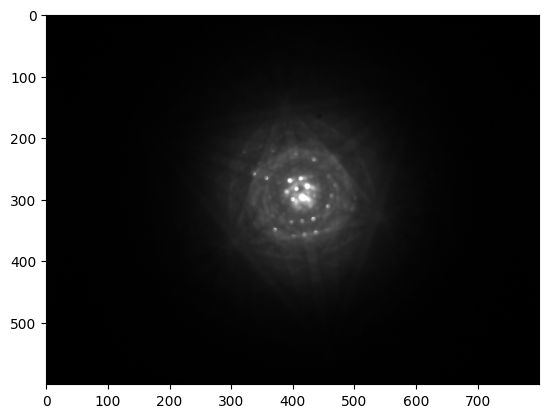

In [4]:
plt.imshow(image_arr, cmap = 'gray')

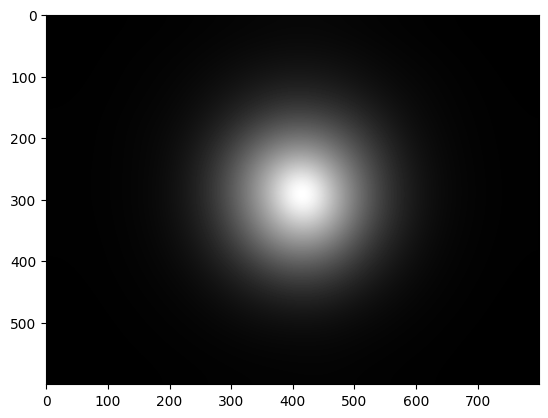

In [5]:
# Create background and show it
result = gaussian_filter(image_arr, sigma=30)
plt.imshow(result, cmap = 'gray')

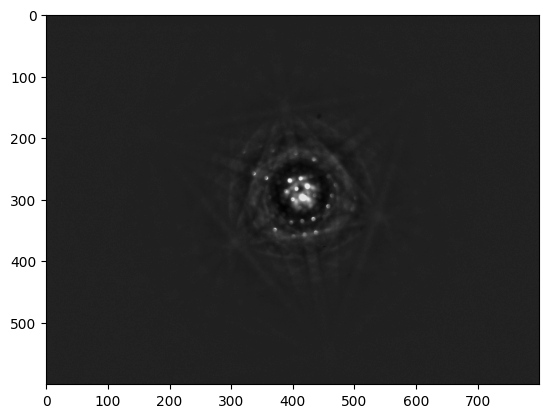

In [6]:
# Remove background from the image and show it
no_background = image_arr - result
plt.imshow(no_background, cmap = 'gray')

In [7]:
# remap intensity in the image to range 0-255
def remap(x):
    minimum = np.amin(x)
    maximum = np.amax(x)
    difference = maximum - minimum
    return ((difference - (maximum - x) ) / difference) * 255

In [ ]:
remapped_image = remap(no_background)
plt.imshow(remapped_image, cmap = "gray")

In [ ]:
# Read the original image
img = no_background
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

In [ ]:
no_background *= 255

In [ ]:
plt.hist(no_background)

threshhold = np.where(((img > -20) & (img < 20)), 255, 0)
plt.imshow(threshhold, cmap = 'gray')

threshhold = np.where(img < 20, img, 0)
plt.imshow(threshhold, cmap = 'gray')

In [ ]:
threshhold = np.where(no_background < -10 & (no_background > -20), no_background, 0)
plt.hist(threshhold)

threshhold2 = threshhold * 10
plt.imshow(threshhold2, cmap = 'gray')


In [ ]:
plt.imshow(threshhold, cmap = 'gray')